## retail store inventory EDA

In [1]:
## Importing libary

# 1. Problem Statement

- Goal: Predict `Units_Sold` (target)
- Inputs: Price, Discount, Weather, Holiday_Promotion, Competitor_Pricing, Seasonality, etc.
- Type: Regression / Forecasting problem


# 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 3. Load Dataset

In [3]:
df = pd.read_csv("retail_store_project.csv")

In [4]:
##df=df.dropna()

## 3 : 1 - top 5 record

In [5]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,Holiday_Promotion,Competitor_Pricing,Seasonality
0,01/01/2022,S001,P0001,Groceries,North,231.0,127.0,55.0,135.47,33.50,20.0,Rainy,0.0,29.69,Autumn
1,01/01/2022,S001,P0002,Toys,South,204.0,150.0,66.0,144.04,63.01,20.0,Sunny,0.0,66.16,Autumn
2,01/01/2022,S001,P0003,Toys,West,102.0,65.0,51.0,74.02,27.99,10.0,Sunny,1.0,31.32,Summer
3,01/01/2022,S001,P0004,Toys,North,469.0,61.0,164.0,62.18,32.72,10.0,Cloudy,1.0,34.74,Autumn
4,01/01/2022,S001,P0005,Electronics,East,166.0,14.0,135.0,9.26,73.64,0.0,Sunny,0.0,68.95,Summer


## 3 : 2 - Bottom 5 record 

In [6]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,Holiday_Promotion,Competitor_Pricing,Seasonality
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
### 3 : 3 -  checking shape of data

In [8]:
df.shape

(1500, 15)

In [9]:
#### there total 15 columns and 1500 row

In [10]:
## 4 Basic information

In [11]:
### 4 : 1 - Data information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1000 non-null   object 
 1   Store ID            1000 non-null   object 
 2   Product ID          1000 non-null   object 
 3   Category            1000 non-null   object 
 4   Region              1000 non-null   object 
 5   Inventory Level     1000 non-null   float64
 6   Units_Sold          1000 non-null   float64
 7   Units_Ordered       1000 non-null   float64
 8   Demand_Forecast     1000 non-null   float64
 9   Price               1000 non-null   float64
 10  Discount            1000 non-null   float64
 11  Weather_Condition   1000 non-null   object 
 12  Holiday_Promotion   1000 non-null   float64
 13  Competitor_Pricing  1000 non-null   float64
 14  Seasonality         1000 non-null   object 
dtypes: float64(8), object(7)
memory usage: 175.9+ KB


In [13]:
#### as per data information there are 7 categorical feature included date, and 8 numerical columns

In [14]:
### 4 : 2 - checking null value

In [15]:
df.isnull().sum()

Date                  500
Store ID              500
Product ID            500
Category              500
Region                500
Inventory Level       500
Units_Sold            500
Units_Ordered         500
Demand_Forecast       500
Price                 500
Discount              500
Weather_Condition     500
Holiday_Promotion     500
Competitor_Pricing    500
Seasonality           500
dtype: int64

In [16]:
#### as per data information there are not indicating any null values

In [17]:
### 4 : 3 - checking duplicated value

In [18]:
df.duplicated().sum()

499

In [19]:
#### there is no any duplicated value

In [20]:
##  5 Descriptive Statistics

In [21]:
### 5:1 Numerical summaries

In [22]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Inventory Level,1000.0,275.39900,127.726684,50.00,170.0000,271.500,388.0000,499.00
Units_Sold,1000.0,136.08600,104.650745,0.00,51.7500,107.500,203.0000,480.00
Units_Ordered,1000.0,109.91900,53.361314,20.00,65.0000,110.000,157.0000,200.00
Demand_Forecast,1000.0,140.98079,105.195853,-8.37,54.9125,113.645,207.3425,480.66
Price,1000.0,56.65425,25.676545,10.06,34.3950,57.810,80.0225,99.92
Discount,1000.0,9.80500,7.059519,0.00,5.0000,10.000,15.0000,20.00
Holiday_Promotion,1000.0,0.49800,0.500246,0.00,0.0000,0.000,1.0000,1.00
Competitor_Pricing,1000.0,56.60273,25.818513,7.60,34.5625,57.565,79.5775,104.06


### Observations
- No missing values.
- Inventory: 50–499, avg ~275.
- Units_Sold: 0–480, highly variable.
- Units_Ordered: ~110 median.
- Demand_Forecast: one negative (needs cleaning).
- Price: 10–100, avg ~57.
- Discount: mostly low (0–20, avg ~10).
- Holiday_Promotion: binary 0/1.
- Competitor_Pricing: similar to Price (7-107)

In [23]:
### 5:2 Unique count for categorical variable

In [24]:
#display(df.select_dtypes(include=['object','category']).nunique())

display(df.select_dtypes(include=['object','category']).nunique())


Date                 10
Store ID              5
Product ID           20
Category              5
Region                4
Weather_Condition     4
Seasonality           4
dtype: int64

In [25]:
## 6. Target Variable Analysis (Units_Sold)


In [26]:
## 6:1 Distribution

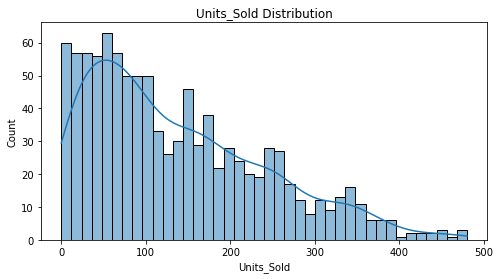

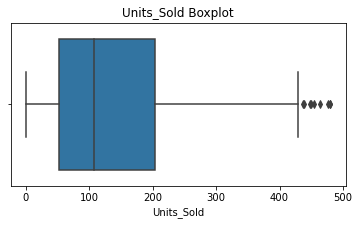

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df['Units_Sold'], bins=40, kde=True)
plt.title('Units_Sold Distribution')
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x=df['Units_Sold'])
plt.title('Units_Sold Boxplot')
plt.show()


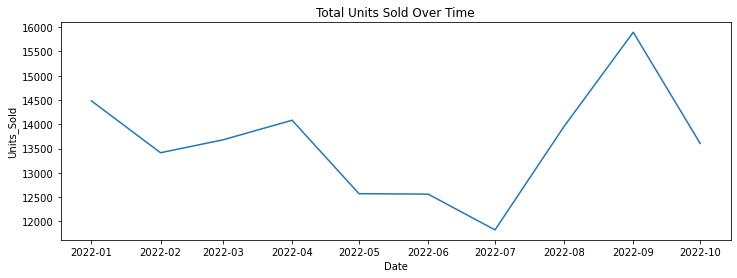

In [28]:
# Trend over time (aggregate)
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Units_Sold'].sum().reset_index()

plt.figure(figsize=(12,4))
plt.plot(daily_sales['Date'], daily_sales['Units_Sold'])
plt.title('Total Units Sold Over Time')
plt.xlabel('Date'); plt.ylabel('Units_Sold')
plt.show()


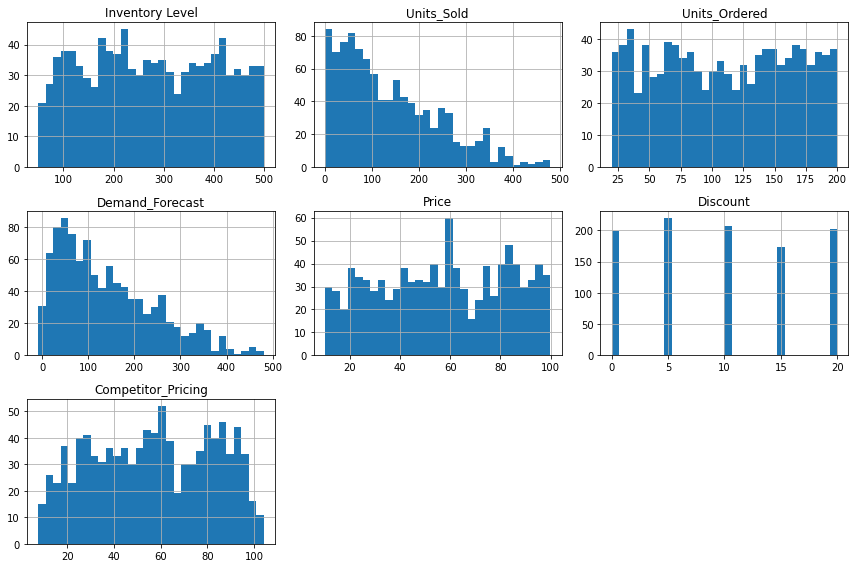

In [29]:
# 7. Numerical Features Analysis
num_cols = ['Inventory Level','Units_Sold','Units_Ordered','Demand_Forecast','Price','Discount','Competitor_Pricing']
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


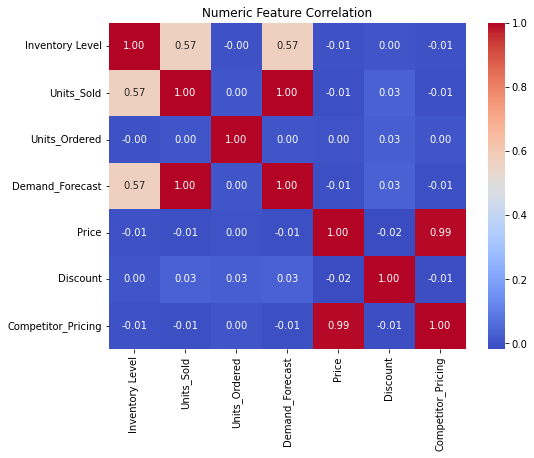

In [30]:
# Correlation with target
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.show()

In [31]:
# Show top correlations with Units_Sold
corr_with_target = corr['Units_Sold'].sort_values(ascending=False)
print("Correlation with Units_Sold:\n", corr_with_target)


Correlation with Units_Sold:
 Units_Sold            1.000000
Demand_Forecast       0.996702
Inventory Level       0.570412
Discount              0.030407
Units_Ordered         0.004302
Price                -0.006371
Competitor_Pricing   -0.007257
Name: Units_Sold, dtype: float64


In [32]:
# 8. Categorical Features Analysis
cat_cols = ['Store ID','Product ID','Category','Region','Weather_Condition','Holiday_Promotion','Seasonality']

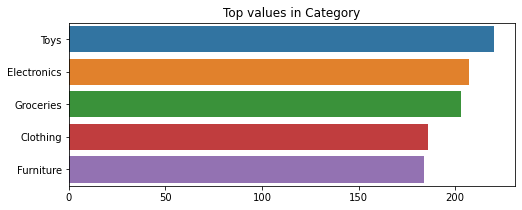

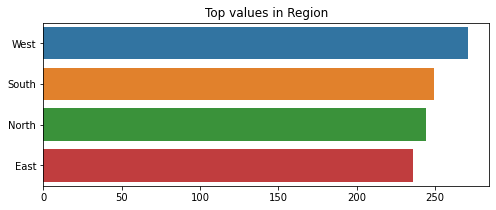

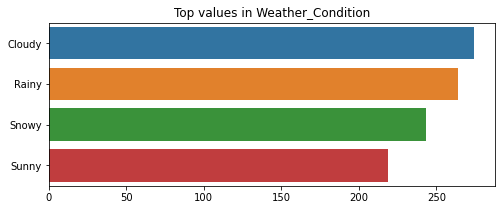

In [33]:
# Count plots for top categories ( Category, Region)
for c in ['Category','Region','Weather_Condition']:
    plt.figure(figsize=(8,3))
    vc = df[c].value_counts().nlargest(20)
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f'Top values in {c}')
    plt.show()



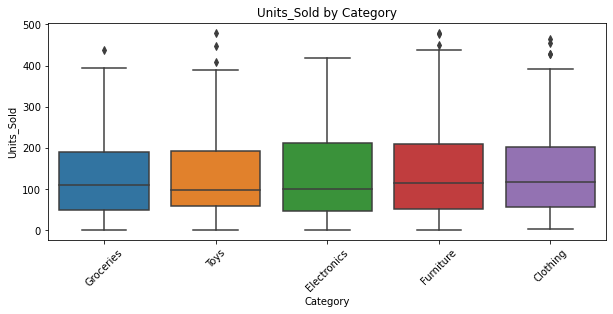

In [34]:
# Boxplot: Units_Sold by Category
plt.figure(figsize=(10,4))
sns.boxplot(x='Category', y='Units_Sold', data=df)
plt.xticks(rotation=45)
plt.title('Units_Sold by Category')
plt.show()


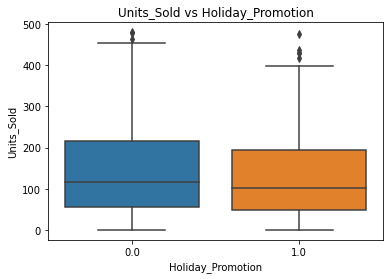

In [35]:
# Holiday promotion effect
plt.figure(figsize=(6,4))
sns.boxplot(x='Holiday_Promotion', y='Units_Sold', data=df)
plt.title('Units_Sold vs Holiday_Promotion')
plt.show()

In [36]:
# 9. Time-based Features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['weekday'] = df['Date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)


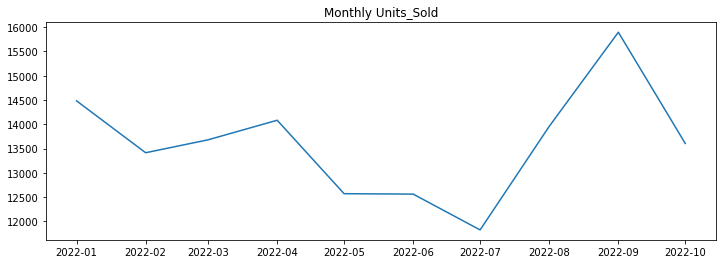

In [37]:
# Aggregations for seasonality
monthly = df.groupby(['year','month'])['Units_Sold'].sum().reset_index()
monthly['ym'] = pd.to_datetime(monthly[['year','month']].assign(day=1))
plt.figure(figsize=(12,4))
plt.plot(monthly['ym'], monthly['Units_Sold'])
plt.title('Monthly Units_Sold')
plt.show()

In [38]:
# Weekend vs weekday average sales
print(df.groupby('is_weekend')['Units_Sold'].mean())


is_weekend
0    136.318571
1    135.543333
Name: Units_Sold, dtype: float64


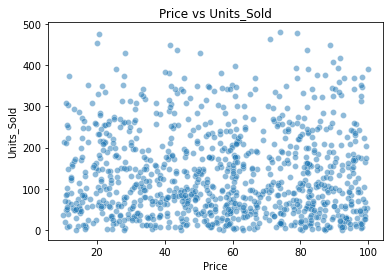

In [39]:
# 10. Feature Relationships
# Price vs Units_Sold scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price', y='Units_Sold', data=df, alpha=0.5)
plt.title('Price vs Units_Sold')
plt.show()

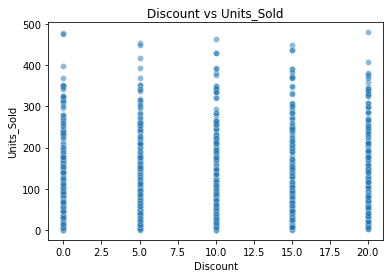

In [40]:
# Discount vs Units_Sold scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount', y='Units_Sold', data=df, alpha=0.5)
plt.title('Discount vs Units_Sold')
plt.show()


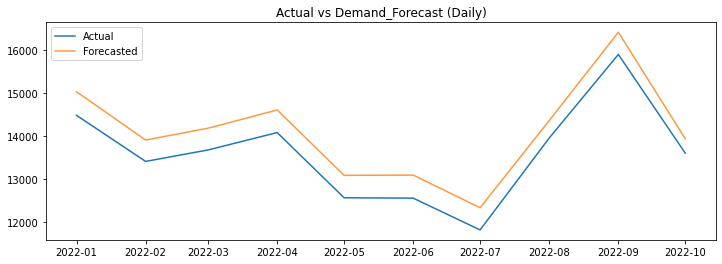

In [41]:
# Compare Demand_Forecast vs actual Units_Sold (aggregate)
df_sample = df.groupby('Date')[['Units_Sold','Demand_Forecast']].sum().reset_index()
plt.figure(figsize=(12,4))
plt.plot(df_sample['Date'], df_sample['Units_Sold'], label='Actual')
plt.plot(df_sample['Date'], df_sample['Demand_Forecast'], label='Forecasted', alpha=0.8)
plt.legend()
plt.title('Actual vs Demand_Forecast (Daily)')
plt.show()


In [42]:
# 11. Missing Values
missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing percent per column:\n", missing_pct)


Missing percent per column:
 Date                  33.333333
Store ID              33.333333
weekday               33.333333
year                  33.333333
month                 33.333333
day                   33.333333
Seasonality           33.333333
Competitor_Pricing    33.333333
Holiday_Promotion     33.333333
Weather_Condition     33.333333
Discount              33.333333
Price                 33.333333
Demand_Forecast       33.333333
Units_Ordered         33.333333
Units_Sold            33.333333
Inventory Level       33.333333
Region                33.333333
Category              33.333333
Product ID            33.333333
is_weekend             0.000000
dtype: float64


In [43]:
# 12. Outlier Detection
# IQR method for Units_Sold
Q1 = df['Units_Sold'].quantile(0.25)
Q3 = df['Units_Sold'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print("Units_Sold IQR bounds:", lower, upper)
outliers = df[(df['Units_Sold'] < lower) | (df['Units_Sold'] > upper)]
print("Outlier count (Units_Sold):", len(outliers))


Units_Sold IQR bounds: -175.125 429.875
Outlier count (Units_Sold): 9


In [44]:
# Option: Cap the values
df['Units_Sold_capped'] = df['Units_Sold'].clip(lower=lower, upper=upper)


In [45]:
# 13. Feature Engineering
# Revenue and effective price
df['Total_Revenue'] = df['Units_Sold'] * df['Price']
df['Effective_Price'] = df['Price'] - df['Discount']


In [46]:
# Lag features by Store+Product (group-wise)
df = df.sort_values(['Store ID','Product ID','Date'])
df['Units_Sold_Lag1'] = df.groupby(['Store ID','Product ID'])['Units_Sold'].shift(1)
df['Units_Sold_Lag7'] = df.groupby(['Store ID','Product ID'])['Units_Sold'].shift(7)
df['Units_Sold_Lag1'].fillna(0, inplace=True)
df['Units_Sold_Lag7'].fillna(0, inplace=True)


In [47]:
# Rolling mean (7-day) daily aggregated sales
daily = df.groupby('Date')['Units_Sold'].sum().reset_index()
daily['rolling_7'] = daily['Units_Sold'].rolling(window=7, min_periods=1).mean()

In [48]:
# 14. Business Validation (quick checks)
# 1) Do discounts increase units sold (on average)?
print("Average Units_Sold when discount>0:", df.loc[df['Discount']>0,'Units_Sold'].mean())
print("Average Units_Sold when discount==0:", df.loc[df['Discount']==0,'Units_Sold'].mean())



Average Units_Sold when discount>0: 136.07980049875312
Average Units_Sold when discount==0: 136.11111111111111


In [49]:
# 2) Do holiday promotions spike sales?
print("Avg Units_Sold during holiday promotion:", df.loc[df['Holiday_Promotion']==1, 'Units_Sold'].mean())
print("Avg Units_Sold without promotion:", df.loc[df['Holiday_Promotion']==0, 'Units_Sold'].mean())


Avg Units_Sold during holiday promotion: 130.85140562248995
Avg Units_Sold without promotion: 141.27888446215138


In [50]:
# 3) Does competitor pricing correlate with own price or affect sales?
print("Corr(Competitor_Pricing, Price) =",
      df['Competitor_Pricing'].corr(df['Price']))
print("Corr(Competitor_Pricing, Units_Sold) =",
      df['Competitor_Pricing'].corr(df['Units_Sold']))


Corr(Competitor_Pricing, Price) = 0.9935594256110729
Corr(Competitor_Pricing, Units_Sold) = -0.007257356039258205


In [51]:
import json


In [52]:
# 15. Summary of Insights (create a condensed text output you can copy to report)

summary = {
    "no_missing": bool(df.isnull().sum().sum() == 0),
    "inventory_range": (
        int(df['Inventory Level'].min()),
        int(df['Inventory Level'].max())
    ),
    "units_sold_mean": float(df['Units_Sold'].mean()),
    "units_sold_variance": float(df['Units_Sold'].std()),
    "demand_forecast_min": float(df['Demand_Forecast'].min()),
    "price_median": float(df['Price'].median()),
    "holiday_ratio": float(df['Holiday_Promotion'].mean())
}

import json
print(json.dumps(summary, indent=2))


{
  "no_missing": false,
  "inventory_range": [
    50,
    499
  ],
  "units_sold_mean": 136.086,
  "units_sold_variance": 104.65074477700765,
  "demand_forecast_min": -8.37,
  "price_median": 57.81,
  "holiday_ratio": 0.498
}


In [53]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,...,day,month,year,weekday,is_weekend,Units_Sold_capped,Total_Revenue,Effective_Price,Units_Sold_Lag1,Units_Sold_Lag7
0,2022-01-01,S001,P0001,Groceries,North,231.0,127.0,55.0,135.47,33.50,...,1.0,1.0,2022.0,5.0,1,127.0,4254.50,13.50,0.0,0.0
100,2022-02-01,S001,P0001,Groceries,West,116.0,81.0,104.0,92.94,27.95,...,1.0,2.0,2022.0,1.0,0,81.0,2263.95,17.95,127.0,0.0
200,2022-03-01,S001,P0001,Electronics,West,154.0,5.0,189.0,5.36,62.70,...,1.0,3.0,2022.0,1.0,0,5.0,313.50,42.70,81.0,0.0
300,2022-04-01,S001,P0001,Groceries,South,85.0,58.0,193.0,52.87,77.88,...,1.0,4.0,2022.0,4.0,0,58.0,4517.04,62.88,5.0,0.0
400,2022-05-01,S001,P0001,Groceries,South,238.0,147.0,37.0,150.27,28.46,...,1.0,5.0,2022.0,6.0,1,147.0,4183.62,8.46,58.0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1000 non-null   datetime64[ns]
 1   Store ID            1000 non-null   object        
 2   Product ID          1000 non-null   object        
 3   Category            1000 non-null   object        
 4   Region              1000 non-null   object        
 5   Inventory Level     1000 non-null   float64       
 6   Units_Sold          1000 non-null   float64       
 7   Units_Ordered       1000 non-null   float64       
 8   Demand_Forecast     1000 non-null   float64       
 9   Price               1000 non-null   float64       
 10  Discount            1000 non-null   float64       
 11  Weather_Condition   1000 non-null   object        
 12  Holiday_Promotion   1000 non-null   float64       
 13  Competitor_Pricing  1000 non-null   float64     

In [55]:
df_final=df.drop('Date',axis=1)

df_final.head()

,Store ID,Product ID,Category,Region,Inventory Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,...,day,month,year,weekday,is_weekend,Units_Sold_capped,Total_Revenue,Effective_Price,Units_Sold_Lag1,Units_Sold_Lag7
0,S001,P0001,Groceries,North,231.0,127.0,55.0,135.47,33.50,20.0,...,1.0,1.0,2022.0,5.0,1,127.0,4254.50,13.50,0.0,0.0
100,S001,P0001,Groceries,West,116.0,81.0,104.0,92.94,27.95,10.0,...,1.0,2.0,2022.0,1.0,0,81.0,2263.95,17.95,127.0,0.0
200,S001,P0001,Electronics,West,154.0,5.0,189.0,5.36,62.70,20.0,...,1.0,3.0,2022.0,1.0,0,5.0,313.50,42.70,81.0,0.0
300,S001,P0001,Groceries,South,85.0,58.0,193.0,52.87,77.88,15.0,...,1.0,4.0,2022.0,4.0,0,58.0,4517.04,62.88,5.0,0.0
400,S001,P0001,Groceries,South,238.0,147.0,37.0,150.27,28.46,20.0,...,1.0,5.0,2022.0,6.0,1,147.0,4183.62,8.46,58.0,0.0


In [59]:
df_final.isnull().sum()

Store ID              500
Product ID            500
Category              500
Region                500
Inventory Level       500
Units_Sold            500
Units_Ordered         500
Demand_Forecast       500
Price                 500
Discount              500
Weather_Condition     500
Holiday_Promotion     500
Competitor_Pricing    500
Seasonality           500
day                   500
month                 500
year                  500
weekday               500
is_weekend              0
Units_Sold_capped     500
Total_Revenue         500
Effective_Price       500
Units_Sold_Lag1         0
Units_Sold_Lag7         0
dtype: int64

In [58]:
df_final.to_csv("retail_data.csv", index=False)


In [63]:
retail_data_final=pd.read_csv("retail_data.csv")
retail_data_final.head(2)

,Store_ID,Product_ID,Category,Region,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,...,day,month,year,weekday,is_weekend,Units_Sold_capped,Total_Revenue,Effective_Price,Units_Sold_Lag1,Units_Sold_Lag7
0,S001,P0001,Groceries,North,231.0,127.0,55.0,135.47,33.50,20.0,...,1.0,1.0,2022.0,5.0,1,127.0,4254.50,13.50,0,0
1,S001,P0001,Groceries,West,116.0,81.0,104.0,92.94,27.95,10.0,...,1.0,2.0,2022.0,1.0,0,81.0,2263.95,17.95,127,0


In [74]:
retail_data_final['Holiday_Promotion']

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1495    NaN
1496    NaN
1497    NaN
1498    NaN
1499    NaN
Name: Holiday_Promotion, Length: 1500, dtype: float64

In [66]:
df_retail=retail_data_final.dropna()

In [71]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store_ID            1000 non-null   object 
 1   Product_ID          1000 non-null   object 
 2   Category            1000 non-null   object 
 3   Region              1000 non-null   object 
 4   Inventory_Level     1000 non-null   float64
 5   Units_Sold          1000 non-null   float64
 6   Units_Ordered       1000 non-null   float64
 7   Demand_Forecast     1000 non-null   float64
 8   Price               1000 non-null   float64
 9   Discount            1000 non-null   float64
 10  Weather_Condition   1000 non-null   object 
 11  Holiday_Promotion   1000 non-null   float64
 12  Competitor_Pricing  1000 non-null   float64
 13  Seasonality         1000 non-null   object 
 14  day                 1000 non-null   float64
 15  month               1000 non-null   float64
 16  year   

In [69]:
df_retail.to_csv("df_retail_data.csv",index=False)